In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("placement_dataset.csv")

In [3]:
df.tail()

,Unnamed: 0,cgpa,iq,placement
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1
99,99,6.2,113.0,1


In [4]:
df.shape

(100, 4)

Steps

0. Preprocess + EDA = Feature Selection
1. Extract input and output cols
2. Scale the Values
3. Train test split
4. Train the model
5. Evaluate model / model selection
6. Deploy the model


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df = df.iloc[: , 1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt


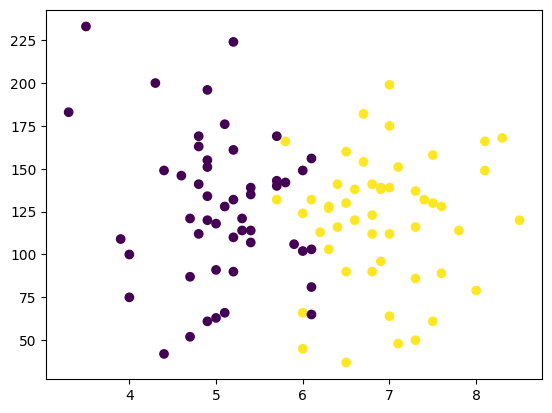

In [9]:
plt.scatter(df["cgpa"] , df["iq"] , c=df["placement"])

In [10]:
X = df.iloc[: , 0 : 2]
Y = df.iloc[: , -1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.1)

In [14]:
X_train

,cgpa,iq
21,7.1,151.0
94,4.7,52.0
86,5.1,128.0
90,7.3,86.0
97,6.7,182.0
...,...,...
33,6.0,149.0
1,5.9,106.0
80,4.9,196.0
14,6.1,103.0


In [15]:
X_test

,cgpa,iq
41,5.4,114.0
66,6.9,96.0
89,4.9,151.0
54,6.4,141.0
63,6.3,128.0
95,4.3,200.0
30,7.6,128.0
98,6.3,103.0
75,4.8,169.0
2,5.3,121.0


In [16]:
Y_train

21    1
94    0
86    0
90    1
97    1
     ..
33    0
1     0
80    0
14    0
60    1
Name: placement, Length: 90, dtype: int64

In [17]:
Y_test

41    0
66    1
89    0
54    1
63    1
95    0
30    1
98    1
75    0
2     0
Name: placement, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler()

In [20]:
X_train = scalar.fit_transform(X_train)

In [21]:
X_train

array([[ 0.9464118 ,  0.70886193],
       [-1.1374307 , -1.73634125],
       [-0.79012361,  0.14078443],
       [ 1.12006534, -0.8965745 ],
       [ 0.59910472,  1.47453162],
       [-2.35300548,  1.49923064],
       [ 0.07814409,  0.83235704],
       [ 0.59910472,  0.782959  ],
       [ 0.42545118,  0.19018247],
       [ 0.9464118 , -1.83513734],
       [ 1.12006534, -1.7857393 ],
       [ 1.38054565, -0.82247744],
       [ 1.29371888,  0.88175509],
       [-0.70329684,  2.51189055],
       [ 0.42545118,  0.93115313],
       [-1.1374307 , -0.87187548],
       [-1.83204486, -0.32849699],
       [-1.1374307 , -0.03210873],
       [-1.05060392,  1.0052502 ],
       [ 0.51227795,  0.38777465],
       [-0.26916299,  0.51126976],
       [ 0.77275826,  0.38777465],
       [-0.87695038, -0.1062058 ],
       [ 2.16198659, -0.05680775],
       [ 1.29371888,  0.19018247],
       [-0.70329684,  0.95585216],
       [ 0.16497086, -0.22970091],
       [-0.18233622,  1.07934727],
       [ 0.42545118,

In [22]:
X_test = scalar.transform(X_test)

In [23]:
X_test

array([[-0.5296433 , -0.20500188],
       [ 0.77275826, -0.64958428],
       [-0.96377715,  0.70886193],
       [ 0.33862441,  0.46187171],
       [ 0.25179763,  0.14078443],
       [-1.48473778,  1.91911402],
       [ 1.38054565,  0.14078443],
       [ 0.25179763, -0.47669113],
       [-1.05060392,  1.15344433],
       [-0.61647007, -0.03210873]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [27]:
# Model Training
clf.fit(X_train , Y_train)

LogisticRegression()

In [33]:
y_pred = clf.predict(X_test)

In [34]:
Y_test

41    0
66    1
89    0
54    1
63    1
95    0
30    1
98    1
75    0
2     0
Name: placement, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(Y_test , y_pred)

1.0

In [39]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.0/1.4 MB 196.9 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.4 MB 196.9 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.4 MB 196.9 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.4 MB 196.9 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.4 MB 156.1 kB/s eta 0:00:09
   - -------------------------------------- 0.1/1.4 MB 156.1 kB/s eta 0:00:09
   -- ------------------------------------- 0.1/1.4 MB 152.8 kB/s eta 0:00:09
   -- ------------------------------------- 0.1/1.4 MB 152.8 kB/s eta 0:00:09
   -- ------------------------------------- 0.1/1.4 MB 152.8 kB/s eta 0:00:09
 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

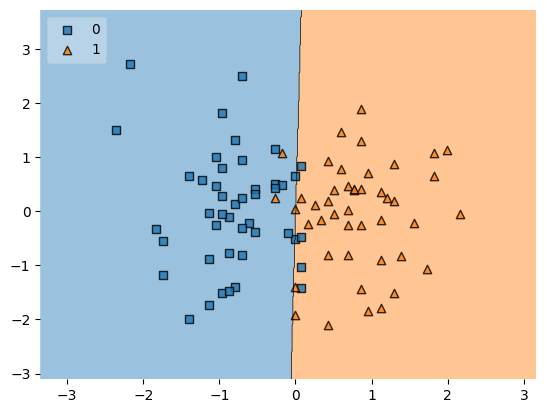

In [41]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [43]:
import pickle

In [45]:
pickle.dump(clf , open('model.pkl' , 'wb'))